In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv("mortality.csv")


In [2]:
df = df[df["Time Period"] == "3-month period"]
df = df[df["Rate Type"] == "Crude"]

df = df[df["Cause of Death"].isin(
    ["Cancer", "Heart disease", "Stroke", "Diabetes", "Homicide", "COVID-19"])]
df_subset = df.loc[:, ['Year and Quarter', 'Cause of Death', "Overall Rate"]]
years_ordered = ['2020 Q1', '2020 Q2', '2020 Q3','2020 Q4', '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4',
'2022 Q1', '2022 Q2', '2022 Q3']
df_subset = df_subset[df_subset["Year and Quarter"].isin(years_ordered)]
df_subset
# Split "Year and Quarter" column into separate "Year" and "Quarter" columns
df_subset[['Year', 'Quarter']] = df_subset['Year and Quarter'].str.split(
    ' ', expand=True)

# Concatenate year, quarter and '-01' to form a date string and convert it into datetime format
df_subset['Date'] = pd.to_datetime(df_subset['Year'] + df_subset['Quarter'].map(
    {'Q1': '-01', 'Q2': '-04', 'Q3': '-07', 'Q4': '-10'}), format='%Y-%m-%d')

# Drop the original "Year and Quarter", "Year", and "Quarter" columns
df_subset.drop(columns=['Year and Quarter', 'Year', 'Quarter'], inplace=True)
df_subset.sort_values("Date")


,Cause of Death,Overall Rate,Date
992,COVID-19,193.2,2020-10-01
993,Cancer,185.1,2020-10-01
996,Diabetes,33.3,2020-10-01
1000,Heart disease,218.5,2020-10-01
1002,Homicide,8.2,2020-10-01
1009,Stroke,51.4,2020-10-01
1053,Stroke,50.5,2021-01-01
1046,Homicide,7.1,2021-01-01
1044,Heart disease,215.8,2021-01-01
1037,Cancer,178.3,2021-01-01


Text(0, 0.5, 'Death Rate per 100,000')

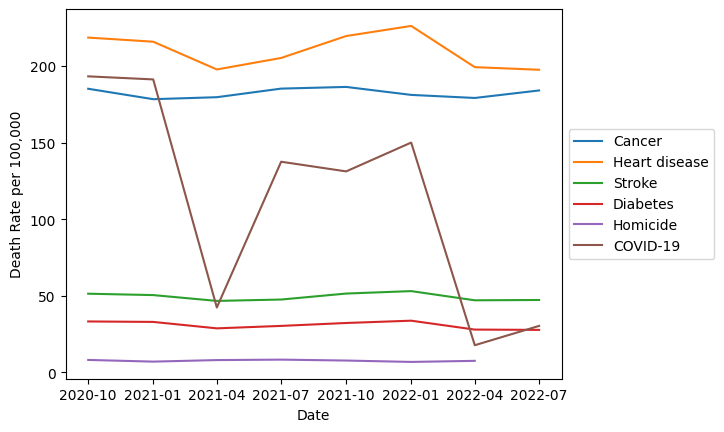

In [3]:
list_of_diseases = ["Cancer", "Heart disease",
                    "Stroke", "Diabetes", "Homicide", "COVID-19"]
fig, ax = plt.subplots()
for x in list_of_diseases: 
    ax.plot(df_subset[df_subset["Cause of Death"] == x]["Date"],
            df_subset[df_subset["Cause of Death"] == x]["Overall Rate"], label=x)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Set x-axis label
plt.xlabel("Date")

# Set y-axis label
plt.ylabel("Death Rate per 100,000")
